In [2]:
#importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv(r'C:\Users\budha\Downloads\Weather_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [4]:
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [5]:
df.head()


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("Weather_Data.csv")

# Print column names to verify them
print(df.columns)


Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')


# EDA TASK KCE080BCT017

1. Extract Time Features from date/time

     ● Create new columns:

     ○ Hour of the day (morning, afternoon, night)

     ○ Day of the week (weekday or weekend)

     ○ Month & Season (Winter, Spring, Summer, Fall)

2. Feature Relationships & Trends

    ● Correlation Analysis: Check how temp_c is related to humidity, wind speed,
    and pressure.

    ● Pairwise Feature Interaction:

    ○ Does high humidity & low wind speed result in higher temperatures?

    ○ How does visibility change with humidity and dew point?

3. Weather Categories

     ● Group weather conditions into:

     ○ Clear, Cloudy, Rainy, Snowy, Foggy

     ● Compare the average temperature for each category.

4. Seasonal Trends in Temperature

     ● Rolling Mean: Find the 7-day and 30-day moving averages of temperature.

     ● Line Plot of Temperature Over Time: Identify any seasonal patterns.

5. Visibility & Fog Analysis

     ● Check the average temperature on low-visibility days vs. clear days.

     ● Does low visibility happen more in high humidity conditions?

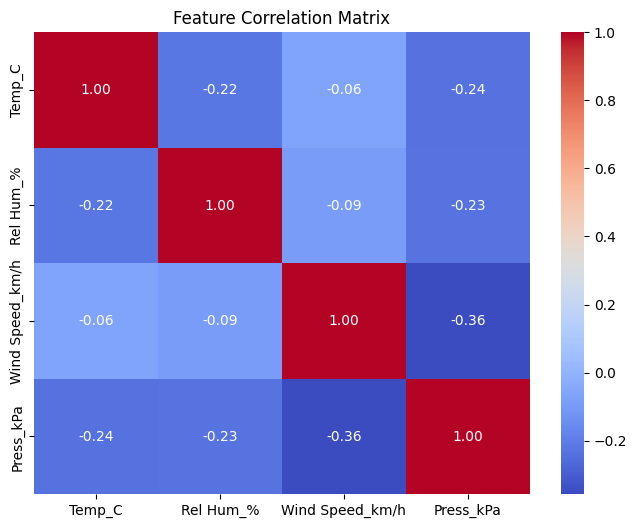

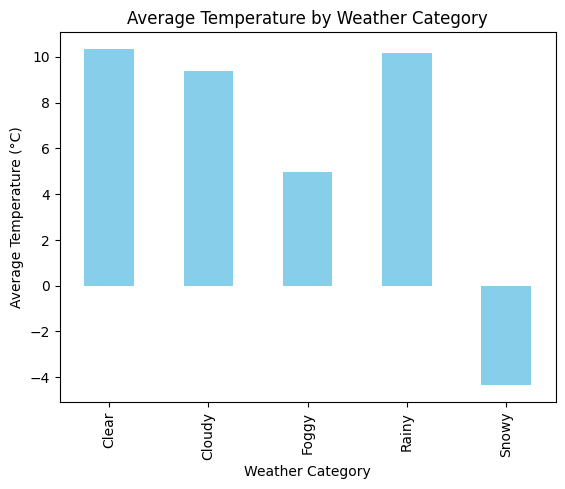

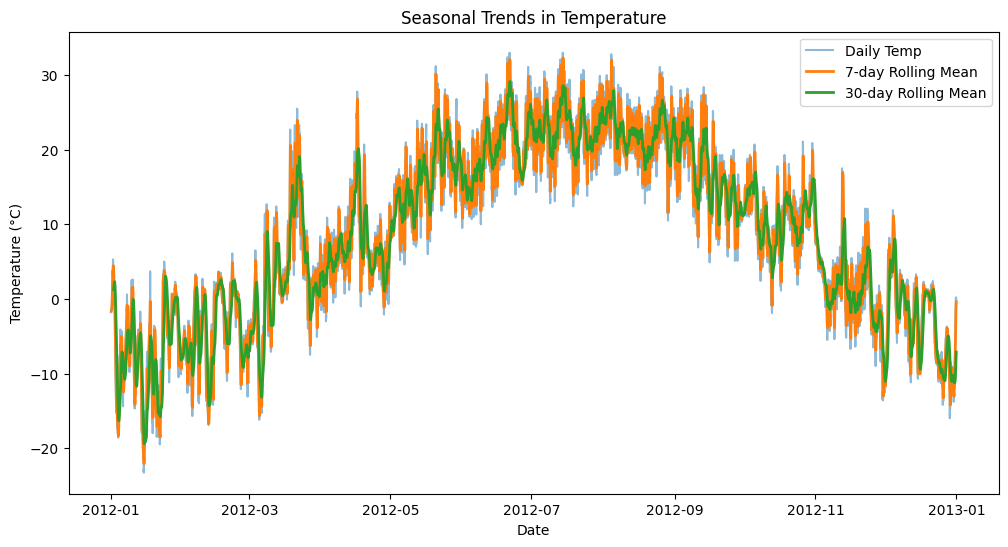

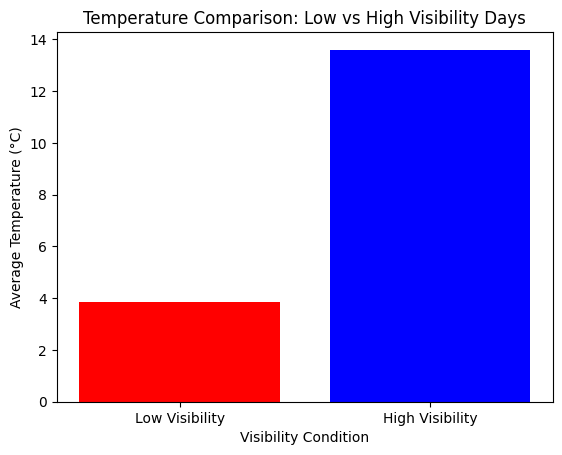

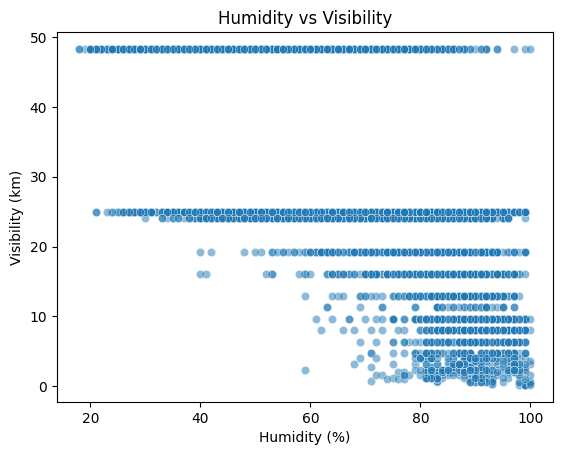

EDA Completed Successfully.


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Weather_Data.csv")

# Convert Date/Time column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Extract Time Features
df['hour_of_day'] = df['Date/Time'].dt.hour
df['day_of_week'] = df['Date/Time'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['month'] = df['Date/Time'].dt.month
df['season'] = df['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                  ('Spring' if x in [3, 4, 5] else
                                   ('Summer' if x in [6, 7, 8] else 'Fall')))

# Feature Relationships & Trends
correlation_matrix = df[['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Press_kPa']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

# Weather Categories
df['weather_category'] = df['Weather'].apply(lambda x: 'Clear' if 'Clear' in x else
                                             ('Cloudy' if 'Cloud' in x else
                                              ('Rainy' if 'Rain' in x else
                                               ('Snowy' if 'Snow' in x else 'Foggy'))))
weather_avg_temp = df.groupby('weather_category')['Temp_C'].mean()
weather_avg_temp.plot(kind='bar', title='Average Temperature by Weather Category', color='skyblue')
plt.xlabel('Weather Category')
plt.ylabel('Average Temperature (°C)')
plt.show()

# Seasonal Trends in Temperature
df['rolling_7d'] = df['Temp_C'].rolling(window=7).mean()
df['rolling_30d'] = df['Temp_C'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['Date/Time'], df['Temp_C'], label='Daily Temp', alpha=0.5)
plt.plot(df['Date/Time'], df['rolling_7d'], label='7-day Rolling Mean', linewidth=2)
plt.plot(df['Date/Time'], df['rolling_30d'], label='30-day Rolling Mean', linewidth=2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Seasonal Trends in Temperature')
plt.show()

# Visibility & Fog Analysis
low_visibility_days = df[df['Visibility_km'] < df['Visibility_km'].quantile(0.25)]
high_visibility_days = df[df['Visibility_km'] > df['Visibility_km'].quantile(0.75)]

low_vis_avg_temp = low_visibility_days['Temp_C'].mean()
high_vis_avg_temp = high_visibility_days['Temp_C'].mean()

plt.bar(['Low Visibility', 'High Visibility'], [low_vis_avg_temp, high_vis_avg_temp], color=['red', 'blue'])
plt.xlabel('Visibility Condition')
plt.ylabel('Average Temperature (°C)')
plt.title('Temperature Comparison: Low vs High Visibility Days')
plt.show()

# Humidity & Low Visibility Relationship
sns.scatterplot(data=df, x='Rel Hum_%', y='Visibility_km', alpha=0.5)
plt.xlabel('Humidity (%)')
plt.ylabel('Visibility (km)')
plt.title('Humidity vs Visibility')
plt.show()

print("EDA Completed Successfully.")


# Model training and evaluation step using Linear Regression and Random Forest Regressor from sklearn including One-Hot   Encoding for categorical features like weather conditions. 

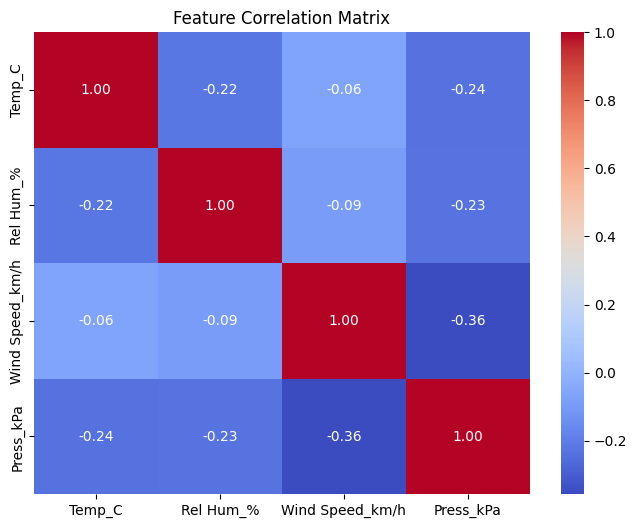

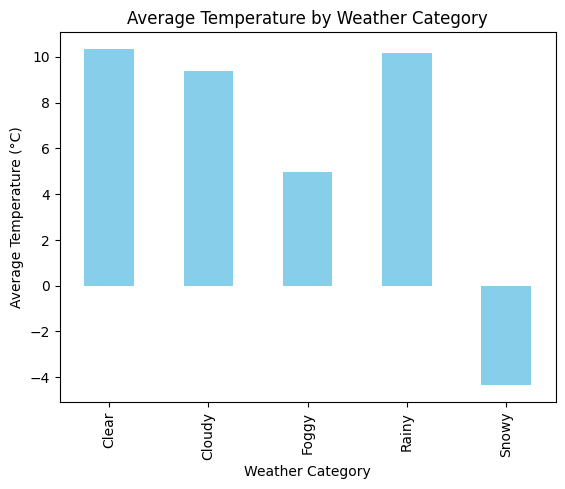

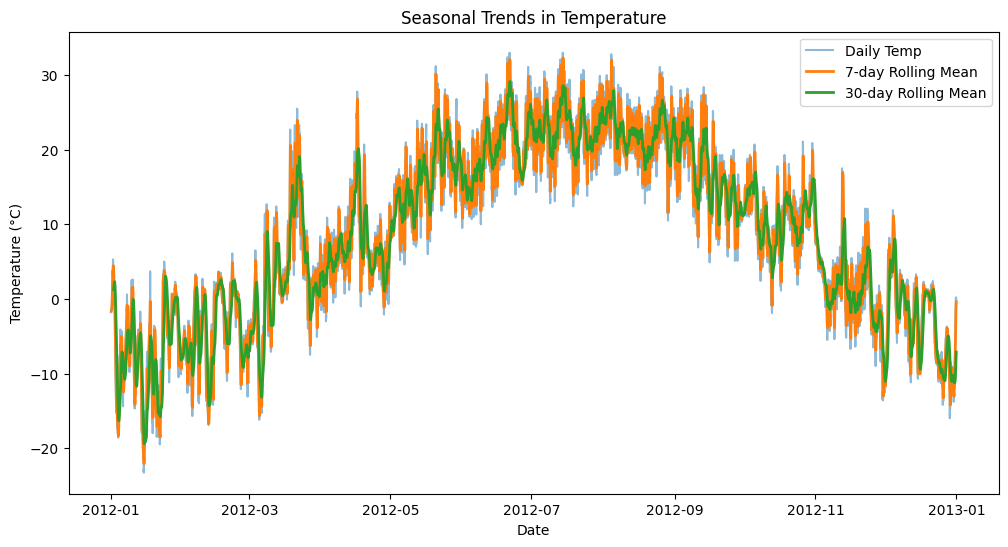

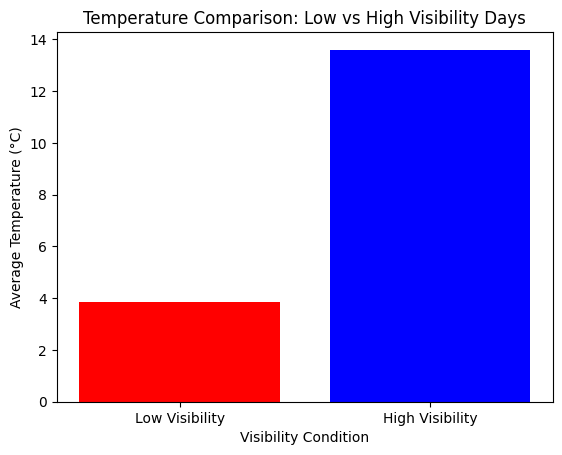

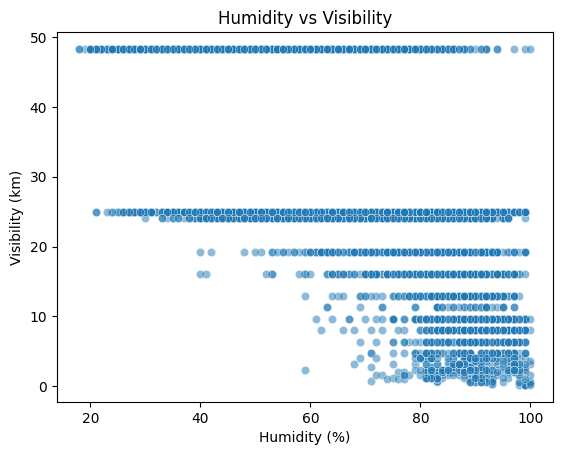

Linear Regression Results:
R² Score: 0.2659
MAE: 8.5166
RMSE: 10.3111

Random Forest Results:
R² Score: 0.6006
MAE: 5.5597
RMSE: 7.6053

EDA and Model Training Completed Successfully.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("Weather_Data.csv")

# Convert Date/Time column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Extract Time Features
df['hour_of_day'] = df['Date/Time'].dt.hour
df['day_of_week'] = df['Date/Time'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['month'] = df['Date/Time'].dt.month
df['season'] = df['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                  ('Spring' if x in [3, 4, 5] else
                                   ('Summer' if x in [6, 7, 8] else 'Fall')))

# Feature Relationships & Trends
correlation_matrix = df[['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Press_kPa']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

# Weather Categories
df['weather_category'] = df['Weather'].apply(lambda x: 'Clear' if 'Clear' in x else
                                             ('Cloudy' if 'Cloud' in x else
                                              ('Rainy' if 'Rain' in x else
                                               ('Snowy' if 'Snow' in x else 'Foggy'))))
weather_avg_temp = df.groupby('weather_category')['Temp_C'].mean()
weather_avg_temp.plot(kind='bar', title='Average Temperature by Weather Category', color='skyblue')
plt.xlabel('Weather Category')
plt.ylabel('Average Temperature (°C)')
plt.show()

# Seasonal Trends in Temperature
df['rolling_7d'] = df['Temp_C'].rolling(window=7).mean()
df['rolling_30d'] = df['Temp_C'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['Date/Time'], df['Temp_C'], label='Daily Temp', alpha=0.5)
plt.plot(df['Date/Time'], df['rolling_7d'], label='7-day Rolling Mean', linewidth=2)
plt.plot(df['Date/Time'], df['rolling_30d'], label='30-day Rolling Mean', linewidth=2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Seasonal Trends in Temperature')
plt.show()

# Visibility & Fog Analysis
low_visibility_days = df[df['Visibility_km'] < df['Visibility_km'].quantile(0.25)]
high_visibility_days = df[df['Visibility_km'] > df['Visibility_km'].quantile(0.75)]

low_vis_avg_temp = low_visibility_days['Temp_C'].mean()
high_vis_avg_temp = high_visibility_days['Temp_C'].mean()

plt.bar(['Low Visibility', 'High Visibility'], [low_vis_avg_temp, high_vis_avg_temp], color=['red', 'blue'])
plt.xlabel('Visibility Condition')
plt.ylabel('Average Temperature (°C)')
plt.title('Temperature Comparison: Low vs High Visibility Days')
plt.show()

# Humidity & Low Visibility Relationship
sns.scatterplot(data=df, x='Rel Hum_%', y='Visibility_km', alpha=0.5)
plt.xlabel('Humidity (%)')
plt.ylabel('Visibility (km)')
plt.title('Humidity vs Visibility')
plt.show()

# Prepare Data for Machine Learning
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_features = encoder.fit_transform(df[['weather_category']])
categorical_columns = encoder.get_feature_names_out(['weather_category'])
encoded_df = pd.DataFrame(categorical_features, columns=categorical_columns)

df_ml = pd.concat([df[['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Press_kPa', 'hour_of_day', 'day_of_week', 'is_weekend']], encoded_df], axis=1)
X = df_ml.drop(columns=['Temp_C'])
y = df_ml['Temp_C']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train & Evaluate Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Results:")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}\n")

print("EDA and Model Training Completed Successfully.")
